# Лабораторная работа №3. Обработка признаков, ч.2
**Студент:** Кривцов Н.А.  
**Группа:** ИУ5-22М   


## Импорт библиотек

In [79]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import scipy.stats as stats
%matplotlib inline

## Загрузка и просмотр датасета

Датасет содержит данные о качестве питьевой воды в 3276 водоемах мира. Для анализа качества используются 9 числовых показателей, таких как pH, жесткость и концентрация различных вредных веществ.

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ММО/water_potability_filled.csv')

In [3]:
data.shape

(3276, 11)

In [4]:
data.head()

,Unnamed: 0,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,KKN_3_ph,KKN_3_Sulfate,KKN_3_Trihalomethanes,Potability
0,0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,6.655223,368.516441,86.990970,0
1,1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,3.716080,351.285226,56.329076,0
2,2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,8.099124,347.323743,66.420093,0
3,3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,8.316766,356.886136,100.341674,0
4,4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,9.092223,310.135738,31.997993,0


In [5]:
data = data.iloc[:,1:]
X_all = data.iloc[:,:-1]
Y_all = data.iloc[:,-1:]

# 1. Масштабирование


In [6]:
X_all.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,KKN_3_ph,KKN_3_Sulfate,KKN_3_Trihalomethanes
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,196.369496,22014.092526,7.122277,426.205111,14.284970,3.966786,7.078662,333.524002,66.404237
std,32.879761,8768.570828,1.583085,80.824064,3.308162,0.780382,1.515094,37.994764,15.888691
min,47.432000,320.942611,0.352000,181.483754,2.200000,1.450000,0.000000,129.000000,0.738000
25%,176.850538,15666.690297,6.127421,365.734414,12.065801,3.439711,6.145051,311.530079,56.322521
50%,196.967627,20927.833607,7.130299,421.884968,14.218338,3.955028,7.053692,333.282412,66.656773
75%,216.667456,27332.762127,8.114887,481.792304,16.557652,4.500320,7.977734,356.172936,77.125356
max,323.124000,61227.196008,13.127000,753.342620,28.300000,6.739000,14.000000,481.030642,124.000000


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, data['Potability'], test_size=0.2)

In [8]:
def arr_to_df(arr):
  return pd.DataFrame(arr, columns=X_all.columns)

In [9]:
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((2620, 9), (656, 9))

In [10]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

In [11]:
scalers= [
    'Масштабирование по Z-оценке',
    'Min-Max масштабирование',
    'Масштабирование по медиане',
]

In [12]:
def get_scaler(label):
  if label == 'Масштабирование по Z-оценке':
    return StandardScaler()
  if label == 'Min-Max масштабирование':
    return MinMaxScaler()
  if label == 'Масштабирование по медиане':
    return RobustScaler()
  else:
    raise ValueError('Некорректный алгоритм масштабирования')

In [13]:
def scaler_analysis(label):
  scaler = get_scaler(label)
  data_scaled = arr_to_df(scaler.fit_transform(X_all))
  scaler = get_scaler(label)
  scaler.fit(X_train)
  data_scaled_train = arr_to_df(scaler.transform(X_train))
  data_scaled_test = arr_to_df(scaler.transform(X_test))
  draw_kde(['Conductivity', 'Solids', 'Organic_carbon', 'Turbidity'], X_all, data_scaled, 'До масштабирования', 'После масштабирования')
  draw_kde(['Conductivity', 'Solids', 'Organic_carbon', 'Turbidity'], data_scaled_train, data_scaled_test, 'Обучающая', 'Тестовая')
  return data_scaled

## 1.1. Масштабирование по Z-оценке

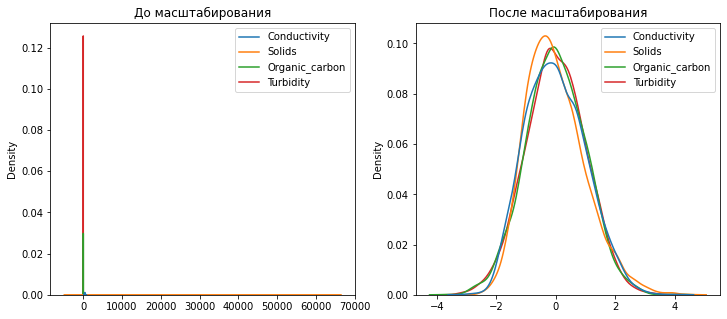

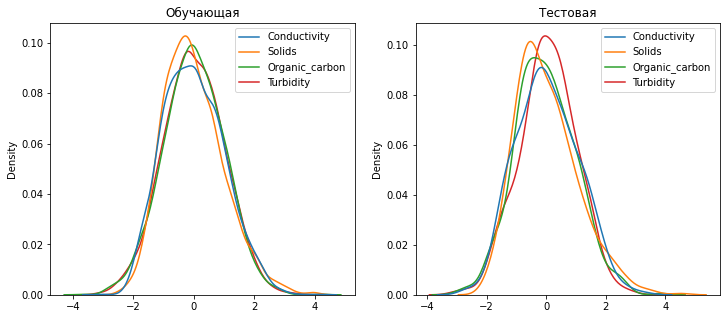

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,KKN_3_ph,KKN_3_Sulfate,KKN_3_Trihalomethanes
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,1.048108e-15,-3.954915e-17,5.111482e-16,1.835460e-16,3.317791e-17,5.387089e-16,1.406079e-16,1.663395e-15,2.012703e-16
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-4.530454e+00,-2.474344e+00,-4.277288e+00,-3.028290e+00,-3.653635e+00,-3.225560e+00,-4.672807e+00,-5.383774e+00,-4.133523e+00
25%,-5.937372e-01,-7.239916e-01,-6.285247e-01,-7.482911e-01,-6.709187e-01,-6.755095e-01,-6.163004e-01,-5.789556e-01,-6.346184e-01
50%,1.819424e-02,-1.238999e-01,5.068209e-03,-5.345935e-02,-2.014487e-02,-1.507005e-02,-1.648325e-02,-6.359479e-03,1.589649e-02
75%,6.174333e-01,6.066532e-01,6.271058e-01,6.878605e-01,6.870970e-01,6.837866e-01,5.935007e-01,5.961977e-01,6.748672e-01
max,3.855680e+00,4.472689e+00,3.793631e+00,4.048144e+00,4.237147e+00,3.552921e+00,4.568953e+00,3.882881e+00,3.625507e+00


In [14]:
scaler_analysis(scalers[0]).describe()

## 1.2. Min-Max масштабирование

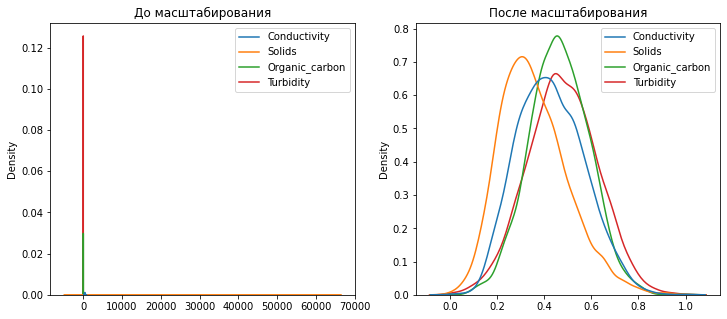

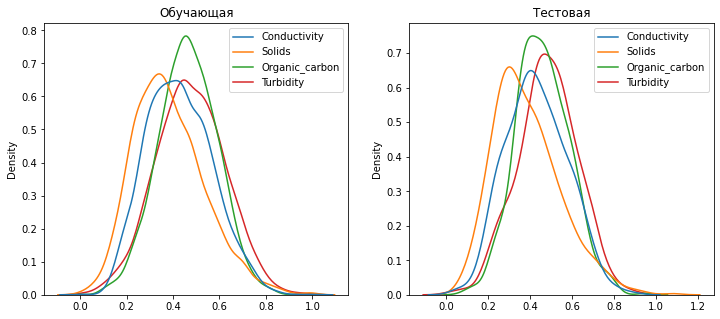

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,KKN_3_ph,KKN_3_Sulfate,KKN_3_Trihalomethanes
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.540231,0.356173,0.529963,0.427940,0.463026,0.475853,0.505619,0.580984,0.532737
std,0.119263,0.143968,0.123921,0.141336,0.126750,0.147548,0.108221,0.107930,0.128902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469432,0.251957,0.452088,0.322196,0.378000,0.376198,0.438932,0.518506,0.450946
50%,0.542401,0.338338,0.530591,0.420386,0.460473,0.473630,0.503835,0.580297,0.534786
75%,0.613857,0.443498,0.607662,0.525145,0.550102,0.576729,0.569838,0.645321,0.619715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
scaler_analysis(scalers[1]).describe()

## 1.3. Масштабирование по медиане

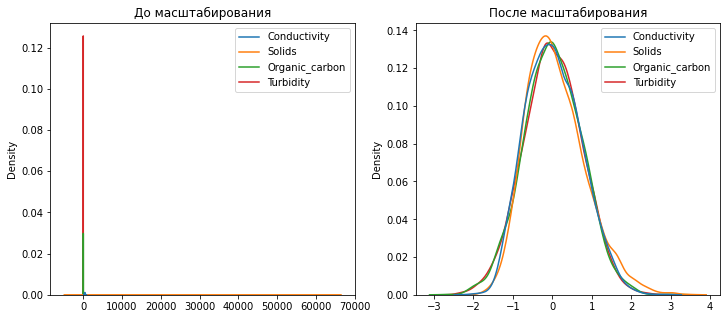

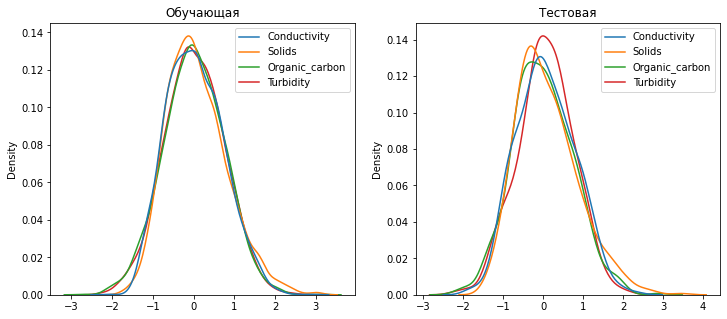

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,KKN_3_ph,KKN_3_Sulfate,KKN_3_Trihalomethanes
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000,3.276000e+03,3276.000000,3276.000000,3276.000000
mean,-1.502203e-02,9.311265e-02,-4.036386e-03,3.722403e-02,0.014834,1.108666e-02,0.013625,0.005412,-0.012139
std,8.257736e-01,7.516301e-01,7.965342e-01,6.964116e-01,0.736481,7.357871e-01,0.826708,0.851083,0.763775
min,-3.755580e+00,-1.766395e+00,-3.410523e+00,-2.071391e+00,-2.675587,-2.361877e+00,-3.848834,-4.575926,-3.168740
25%,-5.052397e-01,-4.509781e-01,-5.046014e-01,-4.838151e-01,-0.479209,-4.858687e-01,-0.495798,-0.487252,-0.496771
50%,-3.568651e-16,-1.559083e-16,2.234541e-16,-2.448874e-16,0.000000,2.093594e-16,0.000000,0.000000,0.000000
75%,4.947603e-01,5.490219e-01,4.953986e-01,5.161849e-01,0.520791,5.141313e-01,0.504202,0.512748,0.503229
max,3.168411e+00,3.454407e+00,3.017259e+00,2.855968e+00,3.134936,2.624881e+00,3.790240,3.309560,2.756510


In [16]:
scaler_analysis(scalers[2]).describe()

# 2. Устранение выбросов

In [17]:
def diagnostic_plots(data, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    plt.axes(axes[0])
    plt.title(column)
    sns.histplot(data[column], ax=axes[0])
    stats.probplot(data[column], dist='norm', plot=axes[1])
   

[None, None, None, None, None, None, None, None, None]

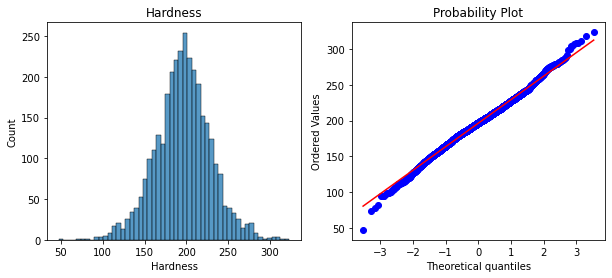

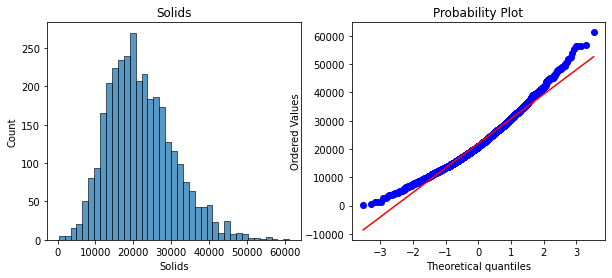

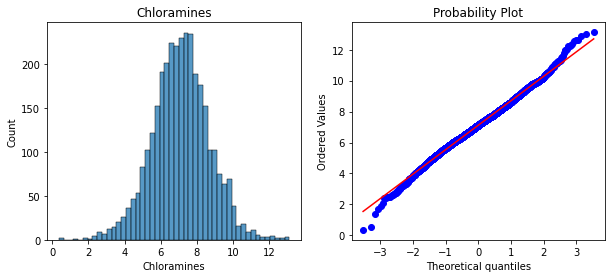

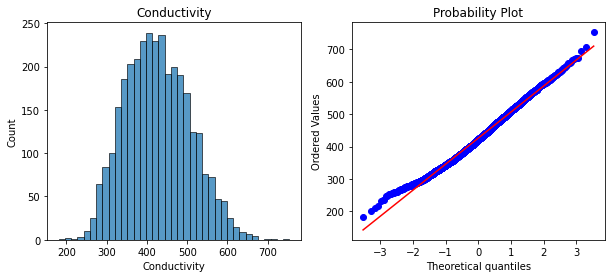

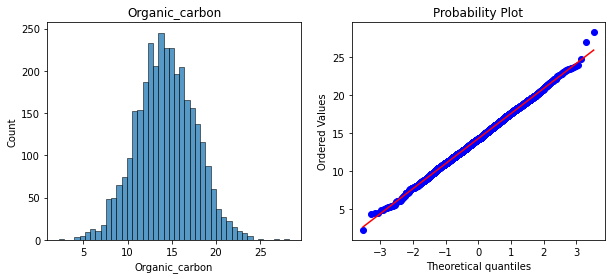

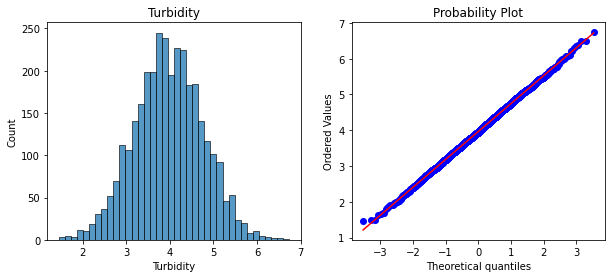

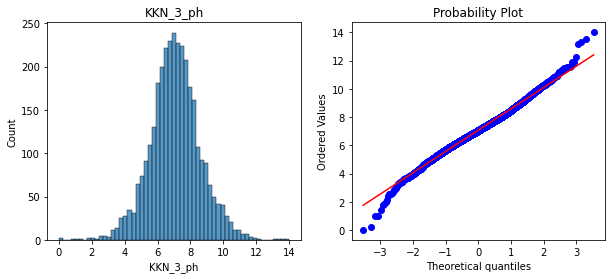

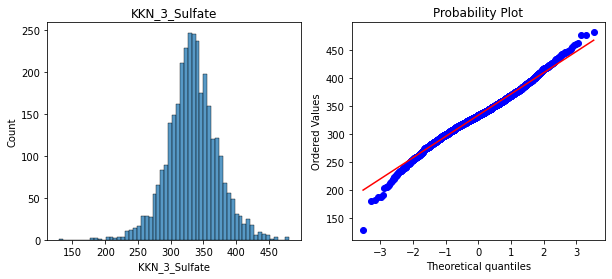

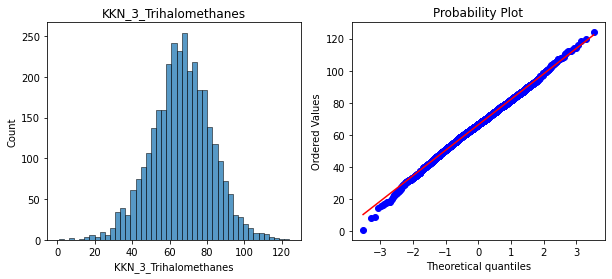

In [18]:
[diagnostic_plots(X_all, c) for c in X_all]

## 2.1. Удаление выбросов

Для удаления выбросов применим метод квантилей 5% и 95% к признаку `Turbidity`, т.к. его распределение близко к нормальному.

In [19]:
col_name = 'Organic_carbon'
col = X_all[col_name]

# верхняя и нижняя границы
lower_bound = col.quantile(0.05)
upper_bound = col.quantile(0.95)

print(lower_bound, upper_bound)

8.81536170240254 19.63725444952086


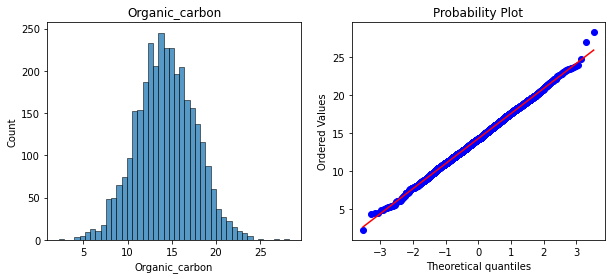

In [20]:
diagnostic_plots(X_all, col_name)

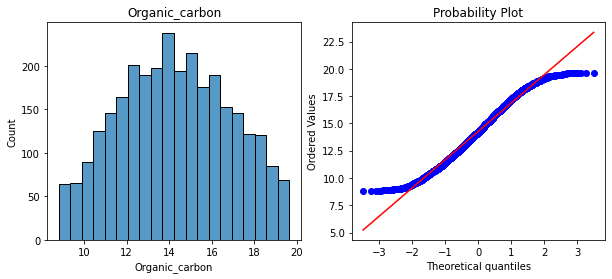

In [21]:
outliers_temp = np.where(col > upper_bound, True, 
                                 np.where(col < lower_bound, True, False))
data_trimmed = X_all.loc[~(outliers_temp), ]
diagnostic_plots(data_trimmed, col_name)  

## 2.2. Замена выбросов

Для замены выбросов применим метод `Inter-Quantile Range` к признаку `Solids`, т.к. его распределение асимметрично (вытянуто вправо).

In [22]:
col_name = 'Solids'
col = X_all[col_name]

K2 = 1.5
IQR = col.quantile(0.75) - col.quantile(0.25)
# верхняя и нижняя границы
lower_bound = col.quantile(0.25) - (K2*IQR)
upper_bound = col.quantile(0.75) + (K2*IQR)

print(lower_bound, upper_bound)

-1832.4174487462951 44831.86987314956


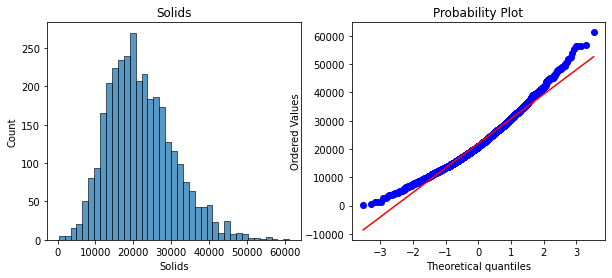

In [23]:
diagnostic_plots(X_all, col_name)

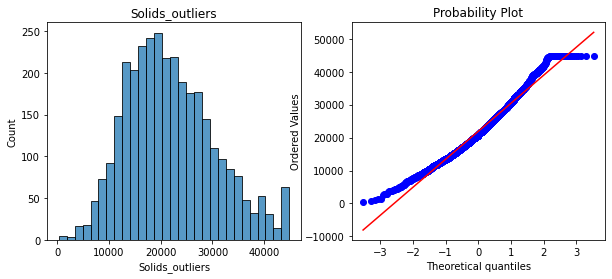

In [24]:
new_col_name = 'Solids_outliers'
data[new_col_name] = np.where(col > upper_bound, upper_bound, np.where(col < lower_bound, lower_bound, col))
diagnostic_plots(data, new_col_name)

In [28]:
data = data.drop(['Solids_outliers'], axis=1)

# 3. Feature Selection

## 3.1. Методы фильтрации

Ознакомимся с корреляционной матрицей рассматриваемых признаков

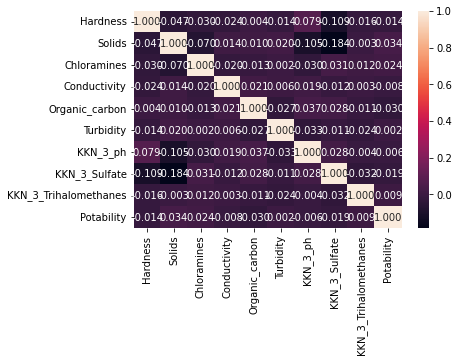

In [29]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

Ни один из признаков не обладает сильной корреляцией с целевым. Применять корреляционные методы фильтрации в таком случае нецелесообразно. 

Перейдем к методу из группы `univariate feature selection`. Для выбора признаков будет использоваться класс `SelectKBest` c критерием хи-квадрат.

In [60]:
# Хи-квадрат
chi2_values, p_values = chi2(X_all, Y_all)
chi2_values = pd.Series(chi2_values)
p_values = pd.Series(p_values)
feat_data = pd.concat([chi2_values, p_values], axis=1)
feat_data.columns = ['chi2_score', 'p_value']
feat_data.index = X_all.columns
feat_data.sort_values(by=['p_value'])

,chi2_score,p_value
Solids,13023.976277,0.000000
KKN_3_Sulfate,4.977437,0.025680
Hardness,3.451841,0.063181
Conductivity,3.316466,0.068589
Organic_carbon,2.258331,0.132897
KKN_3_Trihalomethanes,0.911194,0.339798
Chloramines,0.651609,0.419538
KKN_3_ph,0.033103,0.855628
Turbidity,0.001256,0.971726


In [61]:
sel_chi2 = SelectKBest(chi2, k=4).fit(X_all, Y_all)

list(zip(X_all.columns, sel_chi2.get_support()))

[('Hardness', True),
 ('Solids', True),
 ('Chloramines', False),
 ('Conductivity', True),
 ('Organic_carbon', False),
 ('Turbidity', False),
 ('KKN_3_ph', False),
 ('KKN_3_Sulfate', True),
 ('KKN_3_Trihalomethanes', False)]

## 3.2. Методы обертывания

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)

In [78]:
efs1 = EFS(knn, 
           min_features=3,
           max_features=6,
           scoring='f1',
           print_progress=True,
           cv=5)
Y = Y_all.values.ravel()
efs1 = efs1.fit(X_all, Y, custom_feature_names=X_all.columns)

print('\nBest f1: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 420/420


Best f1: 0.43
Best subset (indices): (4, 6, 7)
Best subset (corresponding names): ('Organic_carbon', 'KKN_3_ph', 'KKN_3_Sulfate')


## 3.3. Методы вложений

In [66]:
gbc = GradientBoostingClassifier()
gbc.fit(X_all, Y_all)
gbc.feature_importances_, sum(gbc.feature_importances_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.10938488, 0.13882553, 0.14055908, 0.05264054, 0.04375816,
        0.03469432, 0.24307573, 0.19691922, 0.04014254]), 0.9999999999999998)

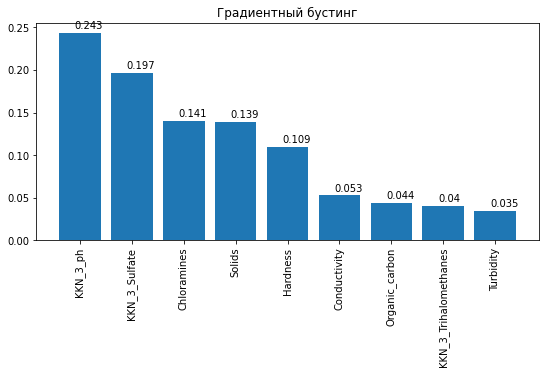

In [67]:
from operator import itemgetter

list_to_sort = list(zip(X_all.columns.values, gbc.feature_importances_))
sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
# Названия признаков
labels = [x for x,_ in sorted_list]
# Важности признаков
data = [x for _,x in sorted_list]
# Вывод графика
fig, ax = plt.subplots(figsize=(9, 4))
ax.set_title('Градиентный бустинг')
ind = np.arange(len(labels))
plt.bar(ind, data)
plt.xticks(ind, labels, rotation='vertical')
# Вывод значений
for a,b in zip(ind, data):
  plt.text(a-0.1, b+0.005, str(round(b,3)))
plt.show()

In [81]:
list(zip(X_all.columns, SelectFromModel(gbc).fit(X_all, Y_all).get_support()))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[('Hardness', False),
 ('Solids', True),
 ('Chloramines', True),
 ('Conductivity', False),
 ('Organic_carbon', False),
 ('Turbidity', False),
 ('KKN_3_ph', True),
 ('KKN_3_Sulfate', True),
 ('KKN_3_Trihalomethanes', False)]

# 4. Обработка атипичного признака

In [115]:
df = pd.read_csv('/content/drive/MyDrive/ММО/games.csv')
df[['created_at', 'last_move_at']]

,created_at,last_move_at
0,1.504210e+12,1.504210e+12
1,1.504130e+12,1.504130e+12
2,1.504130e+12,1.504130e+12
3,1.504110e+12,1.504110e+12
4,1.504030e+12,1.504030e+12
...,...,...
20053,1.499791e+12,1.499791e+12
20054,1.499698e+12,1.499699e+12
20055,1.499698e+12,1.499698e+12
20056,1.499696e+12,1.499697e+12


In [116]:
df = df[['created_at', 'last_move_at']]

In [117]:
import datetime

In [118]:
df['created_at_str'] = df['created_at'].apply(lambda x: datetime.datetime.fromtimestamp(x/1e3))
df['last_move_at_str'] = df['last_move_at'].apply(lambda x: datetime.datetime.fromtimestamp(x/1e3))
df.drop(['created_at', 'last_move_at'], axis=1)

,created_at_str,last_move_at_str
0,2017-08-31 20:06:40.000,2017-08-31 20:06:40.000
1,2017-08-30 21:53:20.000,2017-08-30 21:53:20.000
2,2017-08-30 21:53:20.000,2017-08-30 21:53:20.000
3,2017-08-30 16:20:00.000,2017-08-30 16:20:00.000
4,2017-08-29 18:06:40.000,2017-08-29 18:06:40.000
...,...,...
20053,2017-07-11 16:35:14.342,2017-07-11 16:40:36.076
20054,2017-07-10 14:48:09.760,2017-07-10 15:00:33.979
20055,2017-07-10 14:44:37.493,2017-07-10 14:47:30.327
20056,2017-07-10 14:15:27.019,2017-07-10 14:31:13.718


In [119]:
df['year_start'] = df['created_at_str'].dt.year
df['month_start'] = df['created_at_str'].dt.month
df['day_start'] = df['created_at_str'].dt.day
df['hour_start'] = df['created_at_str'].dt.hour
df['minute_start'] = df['created_at_str'].dt.minute
df['second_start'] = df['created_at_str'].dt.second
df['year_end'] = df['last_move_at_str'].dt.year
df['month_end'] = df['last_move_at_str'].dt.month
df['day_end'] = df['last_move_at_str'].dt.day
df['hour_end'] = df['created_at_str'].dt.hour
df['minute_end'] = df['created_at_str'].dt.minute
df['second_end'] = df['created_at_str'].dt.second
df['game_length'] = df['last_move_at_str'] - df['created_at_str']
df['game_length_sec'] = df['game_length'].apply(lambda x: x.seconds)
df2 = df.iloc[:,4:]
df2

,year_start,month_start,day_start,hour_start,minute_start,second_start,year_end,month_end,day_end,hour_end,minute_end,second_end,game_length,game_length_sec
0,2017,8,31,20,6,40,2017,8,31,20,6,40,0 days 00:00:00,0
1,2017,8,30,21,53,20,2017,8,30,21,53,20,0 days 00:00:00,0
2,2017,8,30,21,53,20,2017,8,30,21,53,20,0 days 00:00:00,0
3,2017,8,30,16,20,0,2017,8,30,16,20,0,0 days 00:00:00,0
4,2017,8,29,18,6,40,2017,8,29,18,6,40,0 days 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,2017,7,11,16,35,14,2017,7,11,16,35,14,0 days 00:05:21.734000,321
20054,2017,7,10,14,48,9,2017,7,10,14,48,9,0 days 00:12:24.219000,744
20055,2017,7,10,14,44,37,2017,7,10,14,44,37,0 days 00:02:52.834000,172
20056,2017,7,10,14,15,27,2017,7,10,14,15,27,0 days 00:15:46.699000,946


In [126]:
dt_features = list(df2.iloc[:,:-2].columns)
dt_features.remove('year_start')
dt_features.remove('year_end')
dt_features

['month_start',
 'day_start',
 'hour_start',
 'minute_start',
 'second_start',
 'month_end',
 'day_end',
 'hour_end',
 'minute_end',
 'second_end']

In [127]:
df2

,year_start,month_start,day_start,hour_start,minute_start,second_start,year_end,month_end,day_end,hour_end,minute_end,second_end,game_length,game_length_sec
0,2017,8,31,20,6,40,2017,8,31,20,6,40,0 days 00:00:00,0
1,2017,8,30,21,53,20,2017,8,30,21,53,20,0 days 00:00:00,0
2,2017,8,30,21,53,20,2017,8,30,21,53,20,0 days 00:00:00,0
3,2017,8,30,16,20,0,2017,8,30,16,20,0,0 days 00:00:00,0
4,2017,8,29,18,6,40,2017,8,29,18,6,40,0 days 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,2017,7,11,16,35,14,2017,7,11,16,35,14,0 days 00:05:21.734000,321
20054,2017,7,10,14,48,9,2017,7,10,14,48,9,0 days 00:12:24.219000,744
20055,2017,7,10,14,44,37,2017,7,10,14,44,37,0 days 00:02:52.834000,172
20056,2017,7,10,14,15,27,2017,7,10,14,15,27,0 days 00:15:46.699000,946


In [133]:
def cosine_encode(v, T, cos=True):
  x = 2*np.pi*v/T
  if cos:
    return np.cos(x)
  else:
    return np.sin(x)

In [128]:
for f in dt_features:
    print(f, df2[f].min(), df2[f].max())

month_start 1 12
day_start 1 31
hour_start 0 23
minute_start 0 59
second_start 0 59
month_end 1 12
day_end 1 31
hour_end 0 23
minute_end 0 59
second_end 0 59


In [129]:
dt_features_periods = [12, 31, 24, 60, 60, 12, 31, 24, 60, 60]

In [134]:
dt_features_cosine = []
for f,p in zip(dt_features, dt_features_periods):
  f_cos = str(f + '_cos')
  f_sin = str(f + '_sin')
  df2[f_cos] = df2.apply(lambda x: cosine_encode(x[f], p), axis=1)
  df2[f_sin] = df2.apply(lambda x: cosine_encode(x[f], p, False), axis=1)
  dt_features_cosine.append(f_cos)
  dt_features_cosine.append(f_sin)
dt_features_cosine  

['month_start_cos',
 'month_start_sin',
 'day_start_cos',
 'day_start_sin',
 'hour_start_cos',
 'hour_start_sin',
 'minute_start_cos',
 'minute_start_sin',
 'second_start_cos',
 'second_start_sin',
 'month_end_cos',
 'month_end_sin',
 'day_end_cos',
 'day_end_sin',
 'hour_end_cos',
 'hour_end_sin',
 'minute_end_cos',
 'minute_end_sin',
 'second_end_cos',
 'second_end_sin']

In [135]:
df2

,year_start,month_start,day_start,hour_start,minute_start,second_start,year_end,month_end,day_end,hour_end,...,month_end_cos,month_end_sin,day_end_cos,day_end_sin,hour_end_cos,hour_end_sin,minute_end_cos,minute_end_sin,second_end_cos,second_end_sin
0,2017,8,31,20,6,40,2017,8,31,20,...,-0.500000,-0.866025,1.000000,-2.449294e-16,5.000000e-01,-0.866025,8.090170e-01,0.587785,-0.500000,-0.866025
1,2017,8,30,21,53,20,2017,8,30,21,...,-0.500000,-0.866025,0.979530,-2.012985e-01,7.071068e-01,-0.707107,7.431448e-01,-0.669131,-0.500000,0.866025
2,2017,8,30,21,53,20,2017,8,30,21,...,-0.500000,-0.866025,0.979530,-2.012985e-01,7.071068e-01,-0.707107,7.431448e-01,-0.669131,-0.500000,0.866025
3,2017,8,30,16,20,0,2017,8,30,16,...,-0.500000,-0.866025,0.979530,-2.012985e-01,-5.000000e-01,-0.866025,-5.000000e-01,0.866025,1.000000,0.000000
4,2017,8,29,18,6,40,2017,8,29,18,...,-0.500000,-0.866025,0.918958,-3.943559e-01,-1.836970e-16,-1.000000,8.090170e-01,0.587785,-0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,2017,7,11,16,35,14,2017,7,11,16,...,-0.866025,-0.500000,-0.612106,7.907757e-01,-5.000000e-01,-0.866025,-8.660254e-01,-0.500000,0.104528,0.994522
20054,2017,7,10,14,48,9,2017,7,10,14,...,-0.866025,-0.500000,-0.440394,8.978045e-01,-8.660254e-01,-0.500000,3.090170e-01,-0.951057,0.587785,0.809017
20055,2017,7,10,14,44,37,2017,7,10,14,...,-0.866025,-0.500000,-0.440394,8.978045e-01,-8.660254e-01,-0.500000,-1.045285e-01,-0.994522,-0.743145,-0.669131
20056,2017,7,10,14,15,27,2017,7,10,14,...,-0.866025,-0.500000,-0.440394,8.978045e-01,-8.660254e-01,-0.500000,2.832769e-16,1.000000,-0.951057,0.309017
